

# Entrega 2
## Eliana Janneth Puerta Morales
## Juan Fernando Lopera Muñoz
## Valentina Muñoz Rincón



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json

In [4]:
!pip install kaggle

In [5]:
data = {"username":"juanloperamuoz","key":"0f64b8bbc3b0a82887b4db2c623a941f"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c forest-cover-type-prediction

forest-cover-type-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import zipfile

with zipfile.ZipFile('forest-cover-type-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('forest-cover-type-prediction')

Lectura del archivo

In [11]:
df = pd.read_csv("/content/forest-cover-type-prediction/train.csv")
df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860,31,10,295,98,3644,218,218,135,...,0,0,0,0,0,0,0,0,0,1
96,97,3067,164,11,85,7,6811,230,243,144,...,0,0,0,0,0,0,0,0,0,2
97,98,2804,72,5,543,61,3115,225,231,141,...,0,0,0,0,0,0,0,0,0,2
98,99,2562,59,3,0,0,1116,221,233,148,...,0,0,0,0,0,0,0,0,0,2


In [12]:
df_used = df.copy()

## Simulación de datos para cumplir con el requisito de tener un 5% de datos faltantes en al menos 3 columnas

In [13]:
columns_to_simulate = ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]
random_num = -1

for col in columns_to_simulate:
  for k in range(0,900):
    random_num = np.random.randint(0,high=15120)
    df_used.loc[random_num,col] = np.nan



Descripción de mediciones númericas por columna

In [14]:
df_description = df_used.describe()
df_description

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,14245.000000,14247.000000,14241.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.570165,50.855057,1714.951970,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.008661,60.997116,1324.626162,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,765.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2268.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Columnas simuladas y la cantidad de NaN generados

In [15]:
list_na = df_used.columns[df_used.isna().any()].tolist()
for column in list_na:
  print(f"{column} : {df_used[column].isna().sum()}")

Horizontal_Distance_To_Hydrology : 875
Vertical_Distance_To_Hydrology : 873
Horizontal_Distance_To_Roadways : 879
Horizontal_Distance_To_Fire_Points : 875


## Preprocesamiento de datos

In [16]:
df_without_null = df_used.dropna() #eliminamos todas las columnas con valores en NaN
print(df_without_null["Elevation"].size)
df_without_null.isnull().sum() #Verificamos si las silas en NaA fueron eliminadas

11915


Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Calculamos las medias de las columnas simuladas sin sus valores nulos

In [17]:
means_list = np.mean(df_without_null[columns_to_simulate], axis=0)

In [18]:
for column in columns_to_simulate:
  df_used[column].fillna(means_list[column], inplace=True)

In [19]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  15120 non-null  int64  
 1   Elevation                           15120 non-null  int64  
 2   Aspect                              15120 non-null  int64  
 3   Slope                               15120 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 5   Vertical_Distance_To_Hydrology      15120 non-null  float64
 6   Horizontal_Distance_To_Roadways     15120 non-null  float64
 7   Hillshade_9am                       15120 non-null  int64  
 8   Hillshade_Noon                      15120 non-null  int64  
 9   Hillshade_3pm                       15120 non-null  int64  
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 11  Wilderness_Area1                    15120

In [20]:
df_description = df_used.describe()
df_description

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.548102,50.839667,1715.191439,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,203.841073,59.209920,1285.543899,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,6.000000,799.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,192.000000,37.000000,1384.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,319.000000,75.000000,2188.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
abs(df_used.corr()['Cover_Type']).sort_values(ascending=True)

Soil_Type30                           0.001393
Soil_Type34                           0.003470
Soil_Type18                           0.006312
Soil_Type6                            0.006521
Horizontal_Distance_To_Hydrology      0.007893
Aspect                                0.008015
Soil_Type8                            0.008133
Soil_Type25                           0.008133
Soil_Type16                           0.008793
Soil_Type11                           0.010228
Hillshade_9am                         0.010286
Soil_Type28                           0.012202
Wilderness_Area2                      0.014994
Soil_Type1                            0.015069
Elevation                             0.016090
Soil_Type3                            0.016393
Soil_Type26                           0.017184
Soil_Type14                           0.022019
Soil_Type2                            0.022627
Soil_Type27                           0.023109
Soil_Type21                           0.024410
Soil_Type36  

In [23]:
scaler = MinMaxScaler()
columns_continuous_variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
df_used[columns_continuous_variables] = scaler.fit_transform(df_used[columns_continuous_variables])
df_used.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,0.446285,0.435213,0.317338,0.169433,0.268662,0.248939,0.837418,0.773972,0.544726,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,0.210311,0.305794,0.162576,0.151780,0.086061,0.186581,0.120320,0.147109,0.185061,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,0.258308,0.180556,0.192308,0.049888,0.203488,0.115965,0.771654,0.696774,0.427419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,0.447633,0.350000,0.288462,0.142964,0.248547,0.200871,0.866142,0.800000,0.556452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,0.624874,0.725000,0.423077,0.237528,0.303779,0.317562,0.925197,0.877419,0.673387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


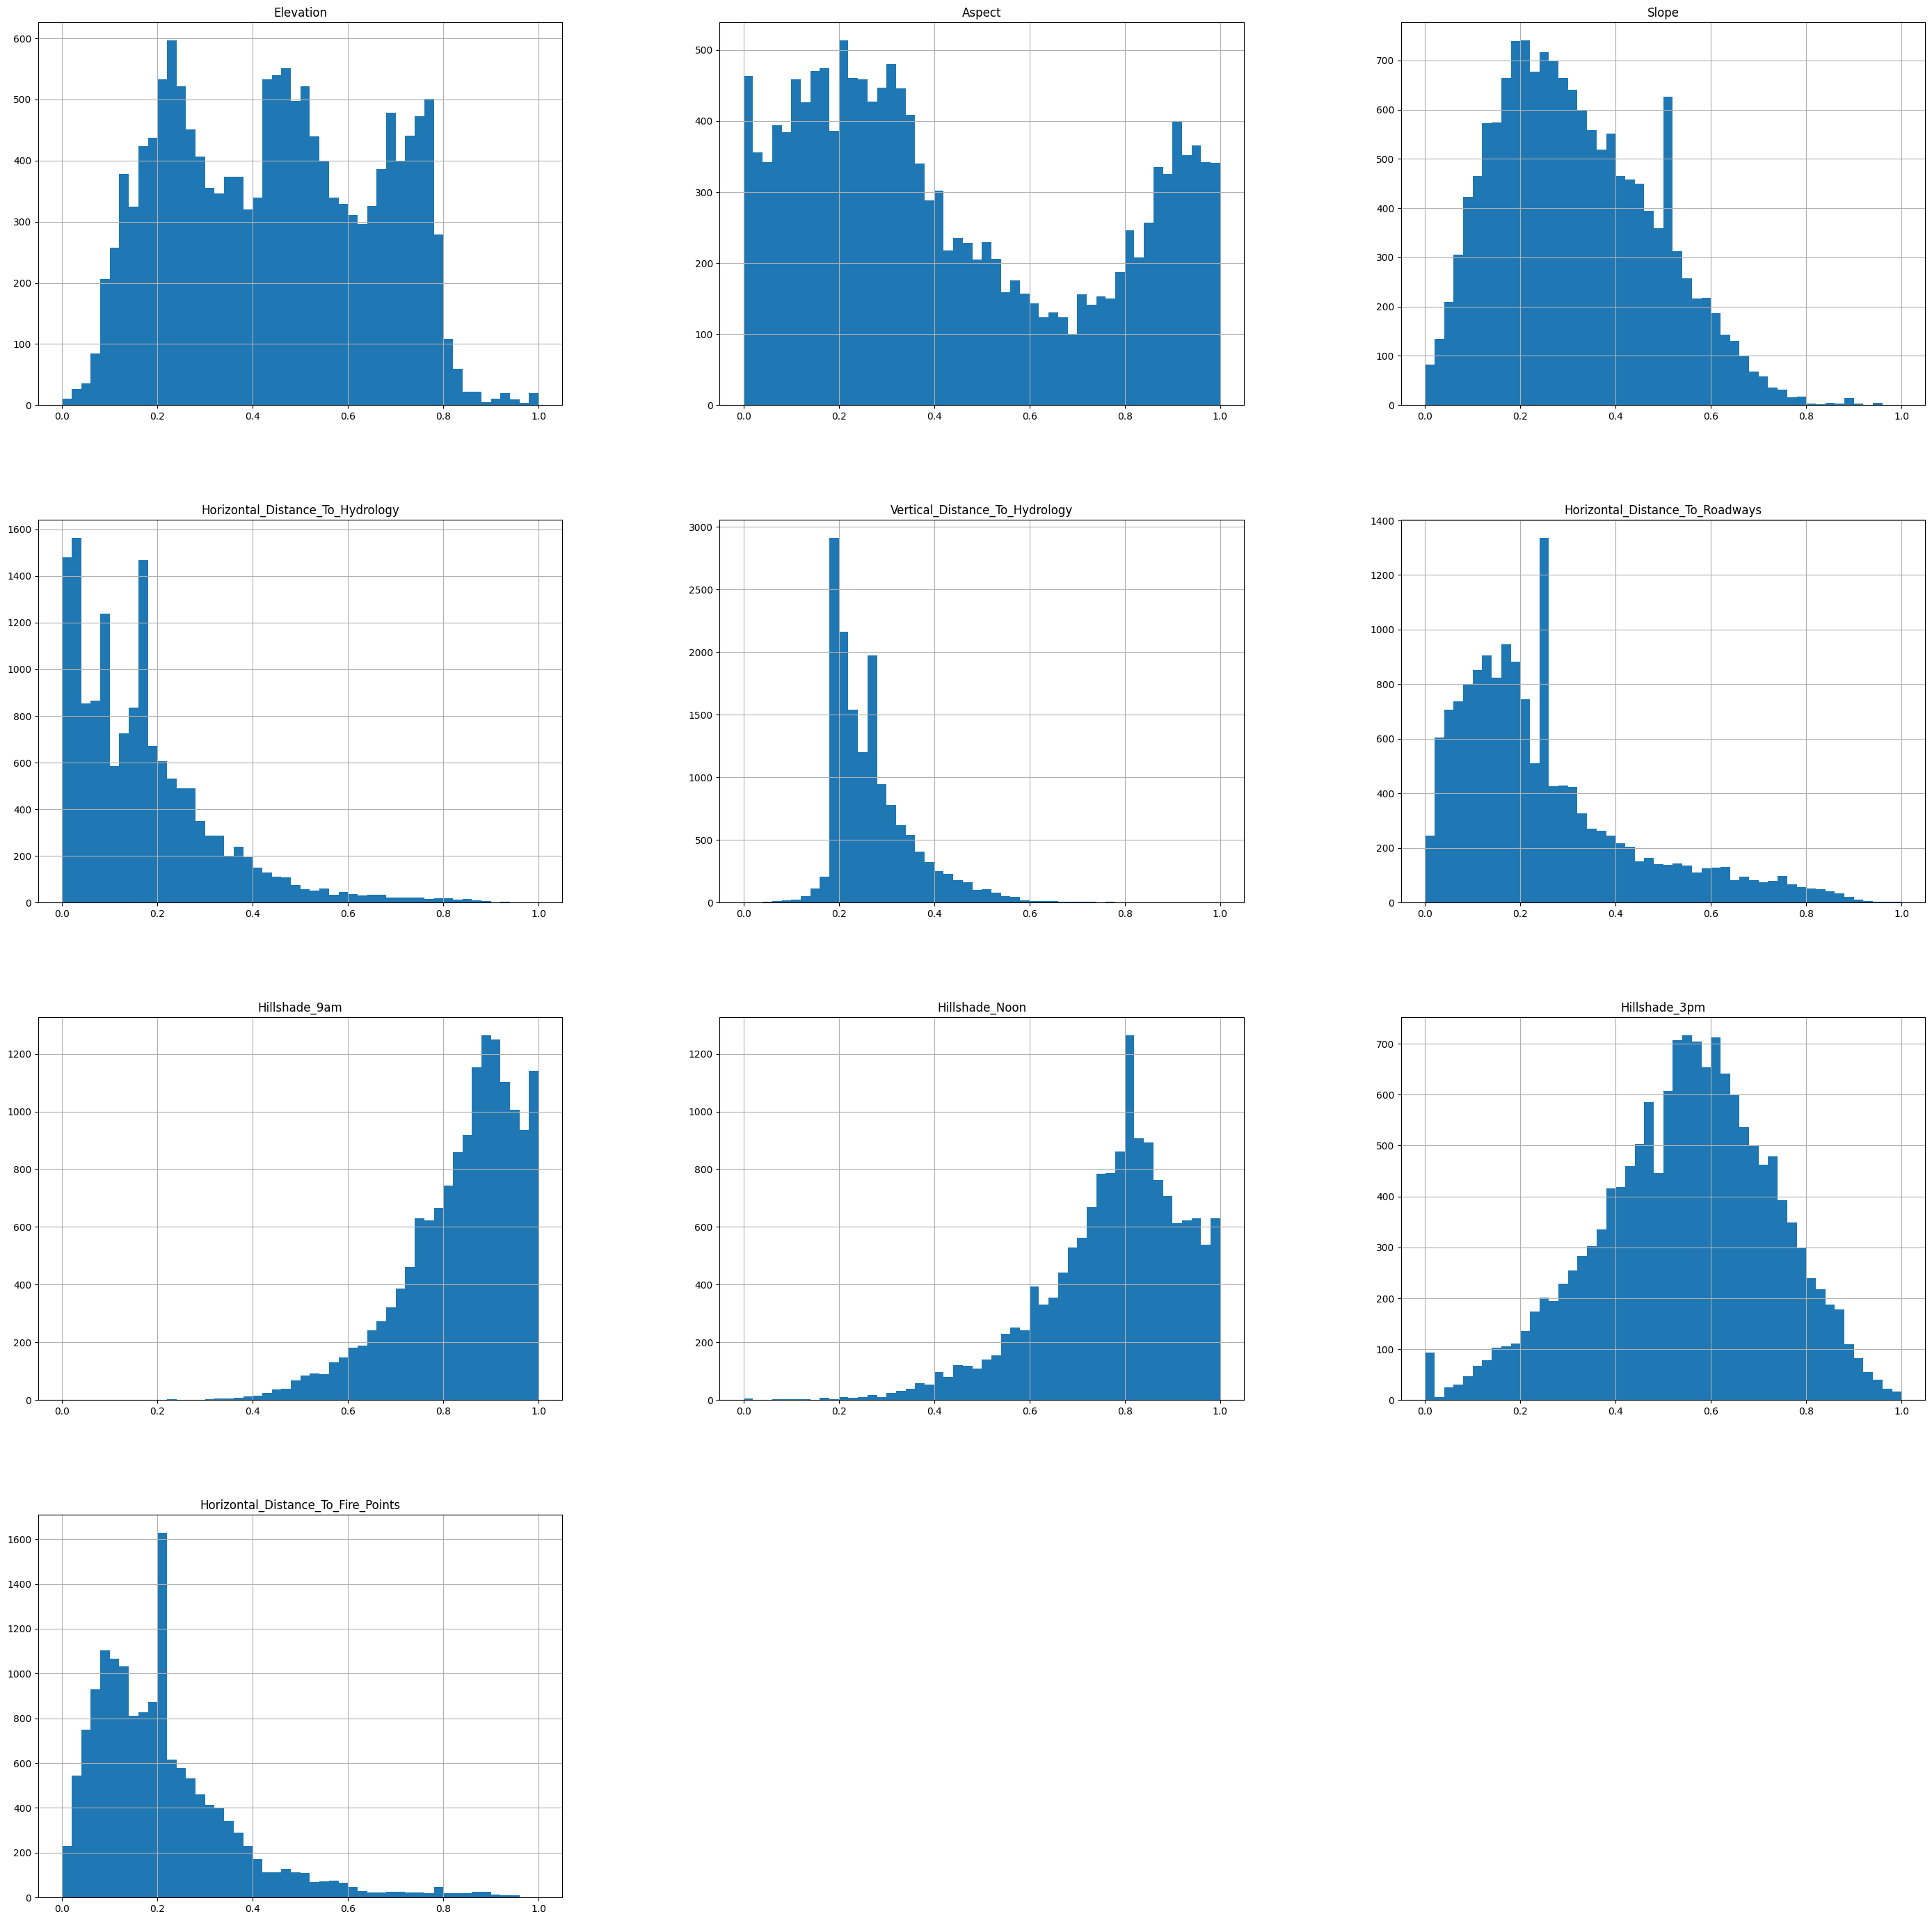

In [24]:
df_used[columns_continuous_variables].hist(figsize = (35,35), bins = 50)
plt.show()